In [2]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx
import csv 
import matplotlib.pyplot as plt

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
june_df = pd.read_csv("../output_network/stance_df_june.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )
dec_df = pd.read_csv("../output_network/stance_df_december.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

### Distribution of each topic stance for each month

In [4]:
def plot_c_subplot(df, color_topics, month, n_bins = 15, num_plots = 3):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    for i in range(num_plots):
        topic = color_topics[i]
        axes[i].hist(df[topic], bins = n_bins)
 
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('frequency')

        axes[i].set_title(f'Distribution of {topic} in {month}')
 
    plt.tight_layout()
    plt.show()

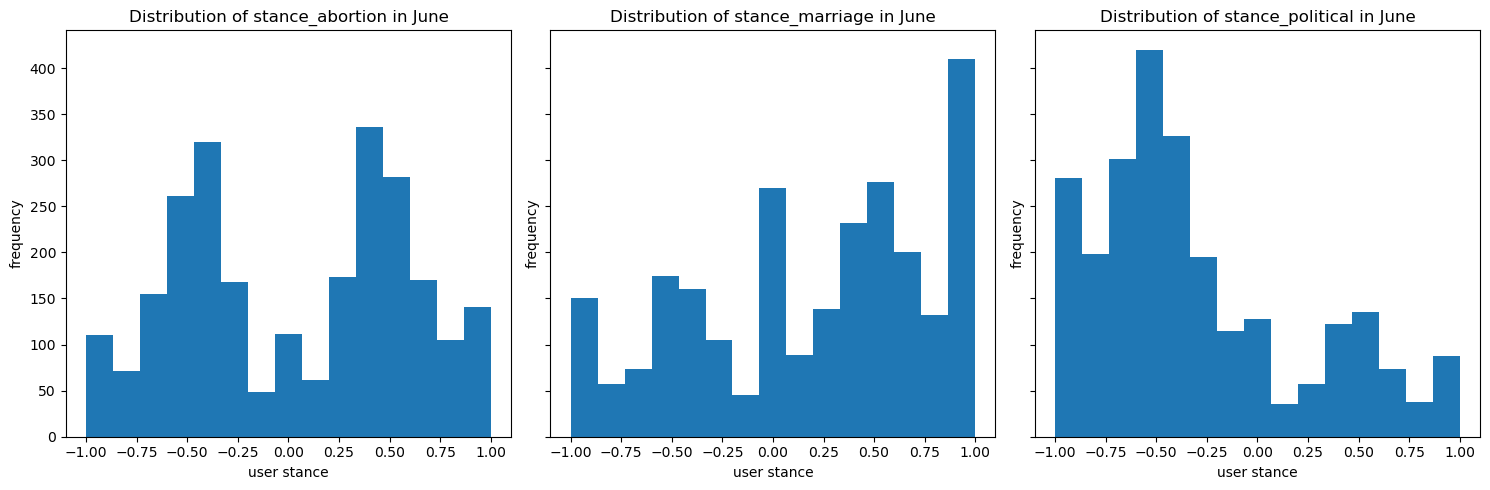

In [5]:
plot_c_subplot(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")

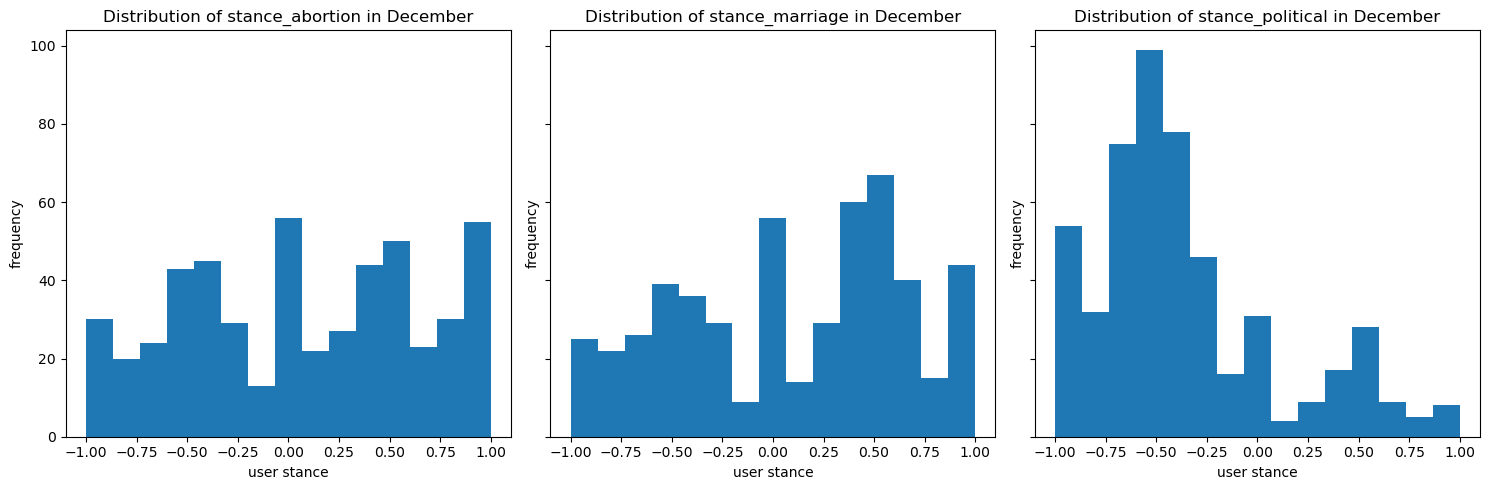

In [6]:
plot_c_subplot(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")

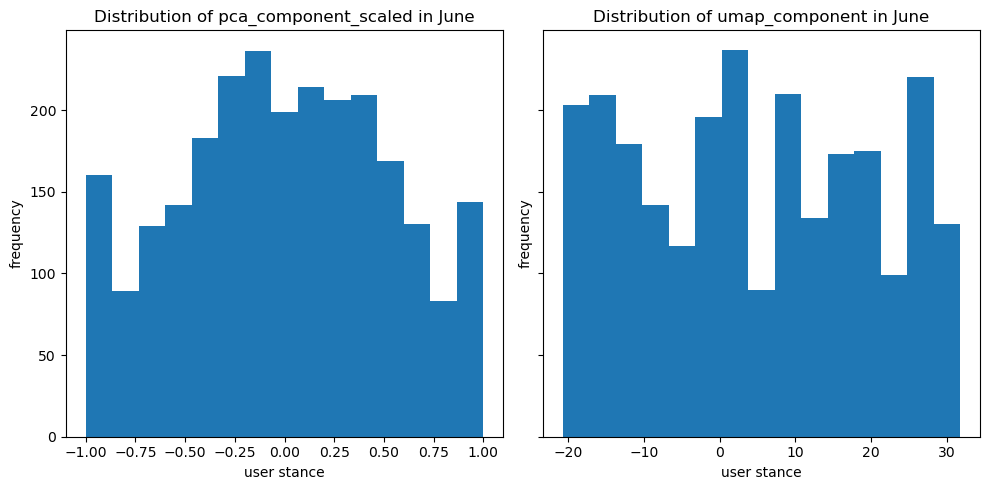

In [7]:
plot_c_subplot(june_df, ["pca_component_scaled", "umap_component"], month = "June", num_plots=2)

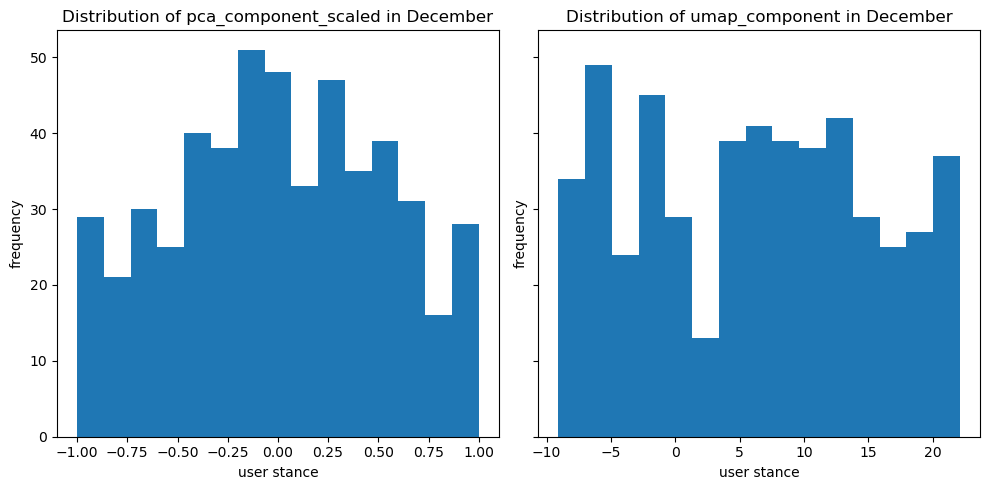

In [8]:
plot_c_subplot(dec_df, ["pca_component_scaled", "umap_component"], month = "December", num_plots=2)

### Networks colored by scaled principal component  

In [9]:
june_df.columns

Index(['Unnamed: 0', 'user', 'A_x', 'F_x', 'N_x', 'stance_abortion', 'A_y',
       'F_y', 'N_y', 'stance_marriage', 'A', 'F', 'N', 'stance_political',
       'stance_political_scaled', 'stance_abortion_scaled',
       'stance_marriage_scaled', 'pca_component', 'umap_component', 'nodeid',
       'pca_component_scaled', 'pca_component1', 'pca_component2',
       'umap_component1', 'umap_component2', 'pca1_scaled', 'pca2_scaled'],
      dtype='object')

In [10]:
attr_dict_june = june_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled"]].to_dict(orient='index')
attr_dict_dec = dec_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled"]].to_dict(orient='index')

In [11]:
# june_dict = june_df.set_index('nodeid')['pca_component_scaled'].to_dict()
# dec_dict  = dec_df.set_index('nodeid')['pca_component_scaled'].to_dict()

In [12]:
net_file = pd.read_csv("../output_network/network_filtered_june.csv", sep="\t")
G_june = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_june)

Graph with 2514 nodes and 23700 edges


In [13]:
net_file = pd.read_csv("../output_network/network_filtered.csv", sep="\t")
G_dec = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_dec)

Graph with 511 nodes and 2785 edges


In [14]:
# setting the attributes 
nx.set_node_attributes(G_june, attr_dict_june)
nx.set_node_attributes(G_dec, attr_dict_dec)
print(G_june.nodes[911729]['pca_component_scaled'])
print(G_dec.nodes[1232857]['pca_component_scaled'])

-0.3719542900291201
0.053076728245611


In [15]:
# checks 
print(june_df[june_df["nodeid"] == 911729]["pca_component_scaled"])
print(dec_df[dec_df["nodeid"] == 1232857]["pca_component_scaled"])

0   -0.371954
Name: pca_component_scaled, dtype: float64
0    0.053077
Name: pca_component_scaled, dtype: float64


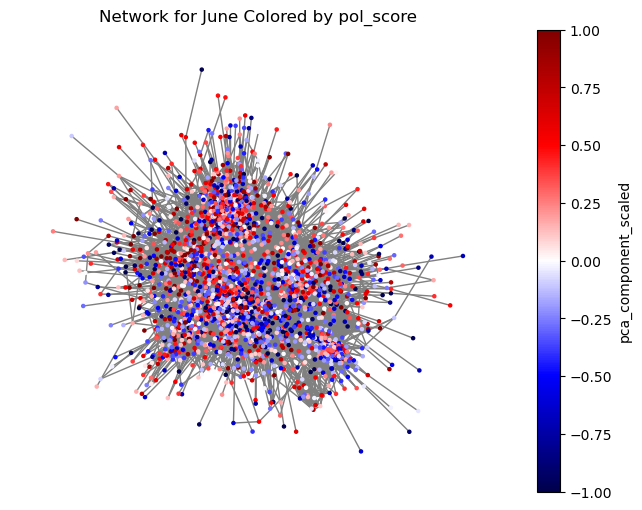

In [16]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_june.nodes[n].get("pca_component_scaled", 0) for n in G_june.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_june, seed=42)  # Or any other layout
nx.draw(
    G_june, pos,
    node_color=values,
    cmap=plt.cm.seismic,   # Red-white-blue colormap
    edge_color='gray', 
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.seismic)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for June Colored by pol_score")
plt.show()

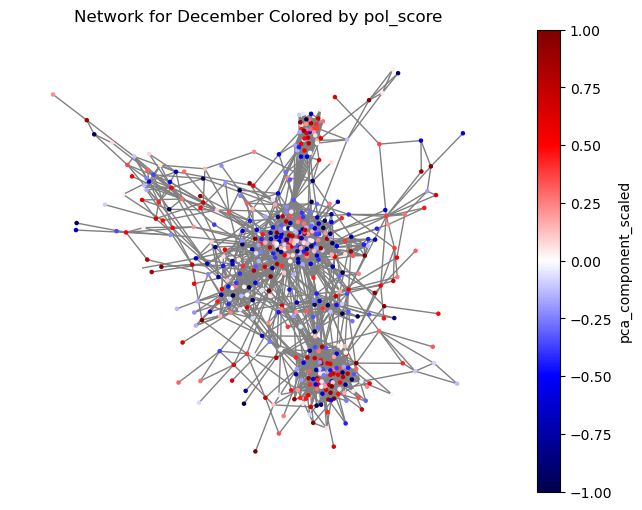

In [17]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_dec.nodes[n].get("pca_component_scaled", 0) for n in G_dec.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_dec, seed=42)  # Or any other layout
nx.draw(
    G_dec, pos,
    node_color=values,
    cmap=plt.cm.seismic,   # Red-white-blue colormap
    edge_color='gray', 
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.seismic)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for December Colored by pol_score")
plt.show()

In [18]:
print("Homophily pca:", nx.attribute_assortativity_coefficient(G_june, "pca_component_scaled", nodes=None), "\n")
print("Homophily abortion", nx.attribute_assortativity_coefficient(G_june, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.attribute_assortativity_coefficient(G_june, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.attribute_assortativity_coefficient(G_june, "stance_political", nodes=None), "\n")

Homophily pca: -0.0005867298433456265 

Homophily abortion -0.0006921594058191086 

Homophily marriage 0.0012592533664777291 

Homophily political -0.0009505493654566606 



In [19]:
print("Homophily pca:", nx.attribute_assortativity_coefficient(G_dec, "pca_component_scaled", nodes=None), "\n")
print("Homophily abortion", nx.attribute_assortativity_coefficient(G_dec, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.attribute_assortativity_coefficient(G_dec, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.attribute_assortativity_coefficient(G_dec, "stance_political", nodes=None), "\n")

Homophily pca: -0.004074110584887919 

Homophily abortion 0.003352604252867144 

Homophily marriage -0.0037899652115279585 

Homophily political -0.003494531298083399 

